TITANIC CLASSIFICATION

In [4]:
#Label_encoding
from sklearn.preprocessing import LabelEncoder
# Data preprocessing 
import pandas as pd
import numpy as np 
#Model Building 
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
#Data visualization 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv('Test_Titanic.csv')

In [6]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [10]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [14]:
df.shape

(891, 12)

In [15]:
df.size

10692

In [18]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [19]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [20]:
df['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [21]:
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [22]:
df['Sex'].unique()

array(['male', 'female'], dtype=object)

In [23]:
df['Pclass'].unique()

array([3, 1, 2], dtype=int64)

In [24]:
df.duplicated().sum()

0

In [25]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [26]:
df['Age'] = df['Age'].fillna(df['Age'].mode().iloc[0])
df['Cabin'] = df['Cabin'].fillna(df['Cabin'].mode().iloc[0])
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode().iloc[0])

In [27]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [28]:
df['Age'].dtype

dtype('float64')

In [31]:
df['Age'] = df['Age'].astype(int)
df['Age'].dtype

dtype('int32')

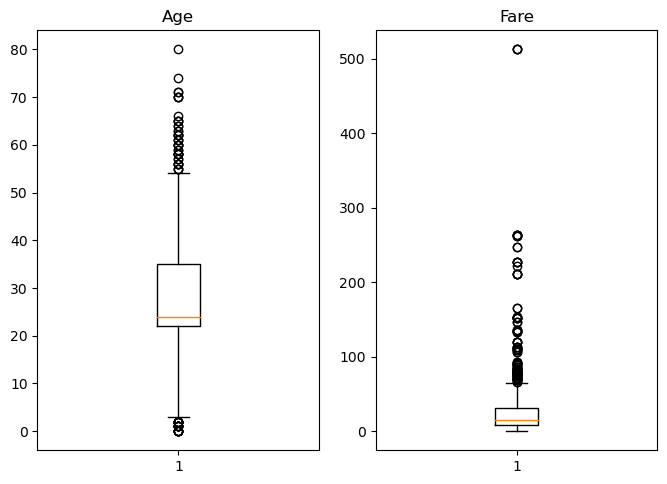

In [32]:
fig, ax = plt.subplots(2, 2, figsize=(8, 12))
ax[0, 0].boxplot(x=df[['Age']])
ax[0, 0].set_title('Age')

ax[0, 1].boxplot(x=df[['Fare']])
ax[0, 1].set_title('Fare')

fig.delaxes(ax[1, 0])
fig.delaxes(ax[1, 1])

plt.show()

In [33]:
Q1_Age=df['Age'].quantile(0.25)
Q3_Age=df['Age'].quantile(0.75)
IQR_Age=Q3_Age - Q1_Age
print(IQR_Age)

13.0


In [34]:
df = df [~((df['Age']<(Q1_Age-1.5*IQR_Age))|(df['Age']>(Q3_Age+1.5*IQR_Age)))]

<Axes: xlabel='Age'>

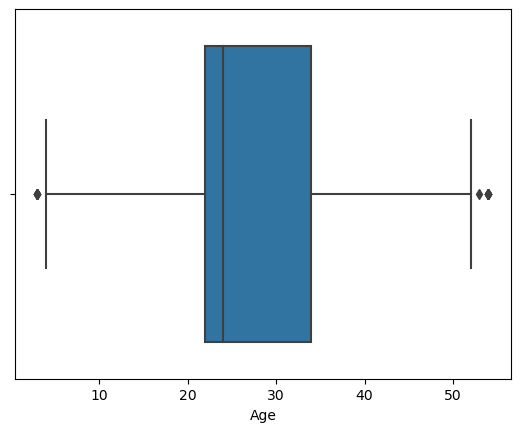

In [35]:
sns.boxplot(x='Age', data=df)

In [36]:
Q1_Fare=df['Fare'].quantile(0.25)
Q3_Fare=df['Fare'].quantile(0.75)
IQR_Fare=Q3_Fare - Q1_Fare
print(IQR_Fare)

22.174999999999997


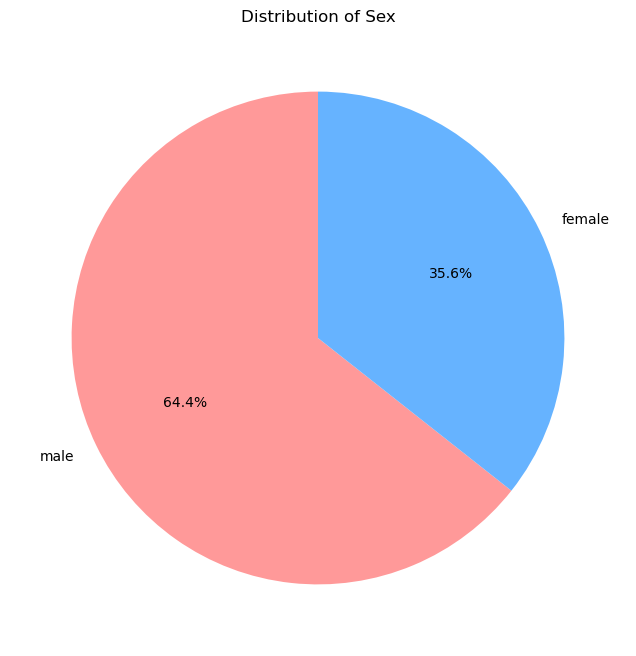

In [37]:
Sex_counts = df['Sex'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(Sex_counts, labels=Sex_counts.index, autopct='%1.1f%%', startangle=90, colors=['#ff9999', '#66b3ff'])
plt.title('Distribution of Sex')
plt.show()

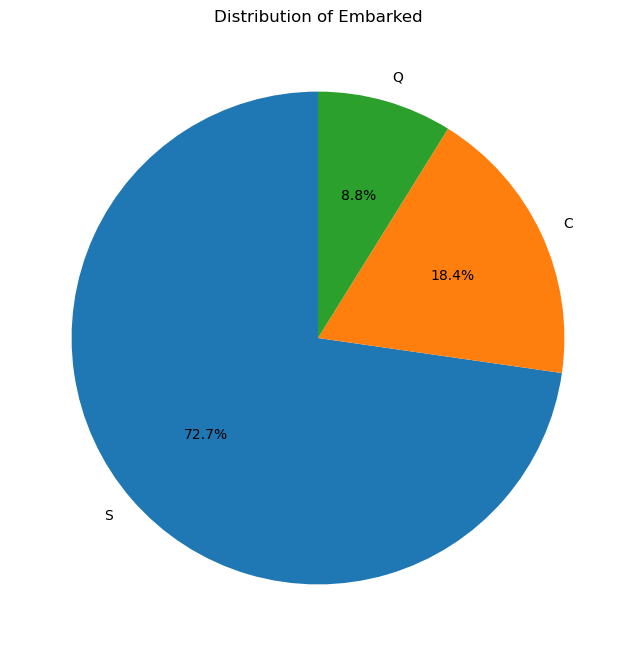

In [38]:
Embarked_counts = df['Embarked'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(Embarked_counts, labels=Embarked_counts.index, autopct='%1.1f%%', startangle=90, colors=['#1f77b4', '#ff7f0e', '#2ca02c'])
plt.title('Distribution of Embarked')
plt.show()

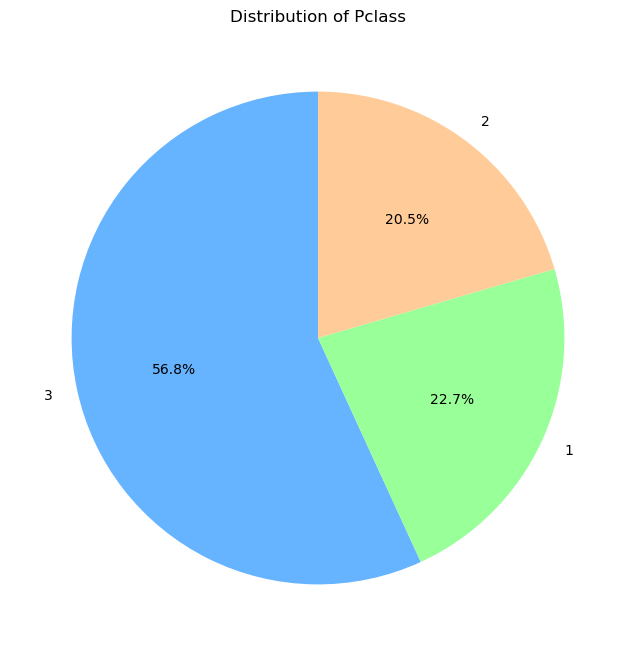

In [39]:
Pclass_counts = df['Pclass'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(Pclass_counts, labels=Pclass_counts.index, autopct='%1.1f%%', startangle=90, colors=['#66b3ff', '#99ff99', '#ffcc99'])
plt.title('Distribution of Pclass')
plt.show()

In [40]:
df['Survived_mapping'] = df['Survived'].map({0: 'Not Survived', 1: 'Survived'})

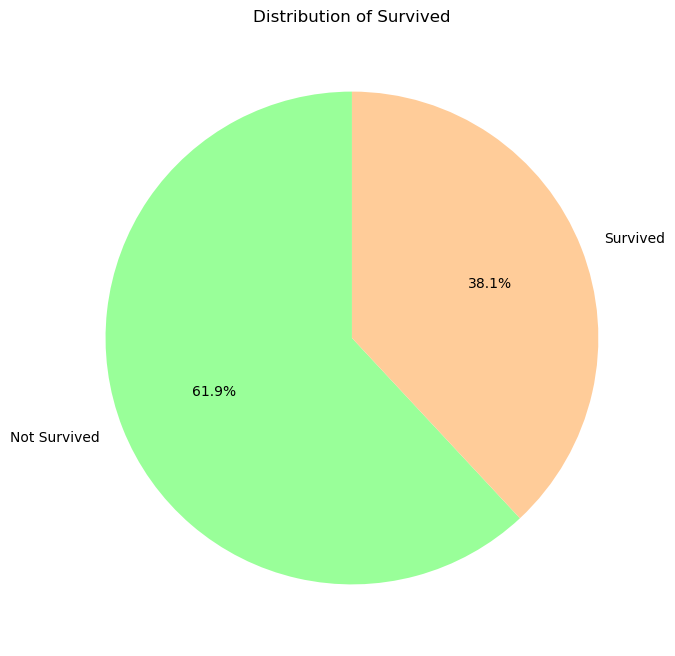

In [41]:
Survived_mapping_counts = df['Survived_mapping'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(Survived_mapping_counts, labels=Survived_mapping_counts.index, autopct='%1.1f%%', startangle=90, colors=['#99ff99', '#ffcc99'])
plt.title('Distribution of Survived')
plt.show()

In [42]:
age_bins = [0, 18, 35, 50, 100]  
age_labels = ['0-18', '19-35', '36-50', '51+']

df['AgeGroup'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)

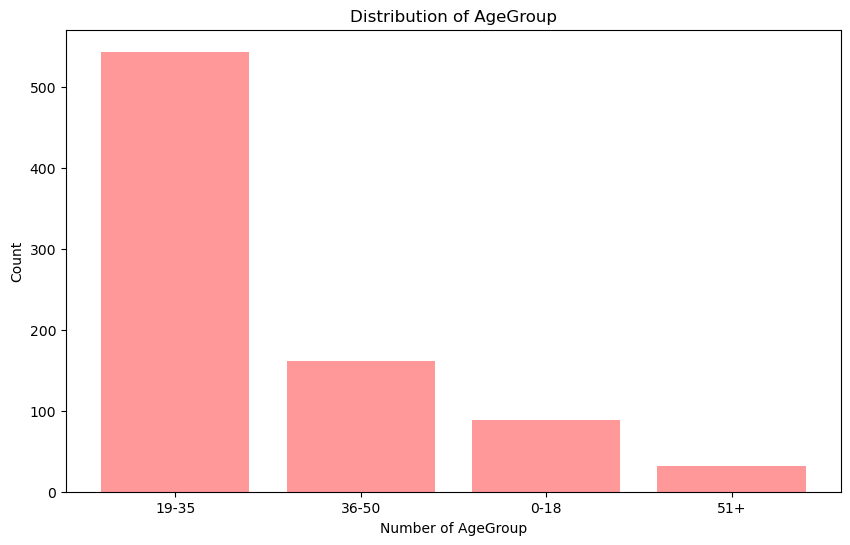

In [43]:
AgeGroup_counts = df['AgeGroup'].value_counts()
plt.figure(figsize=(10, 6))
plt.bar(AgeGroup_counts.index, AgeGroup_counts.values,color='#ff9999')
plt.xlabel('Number of AgeGroup')
plt.ylabel('Count')
plt.title('Distribution of AgeGroup')
plt.show()

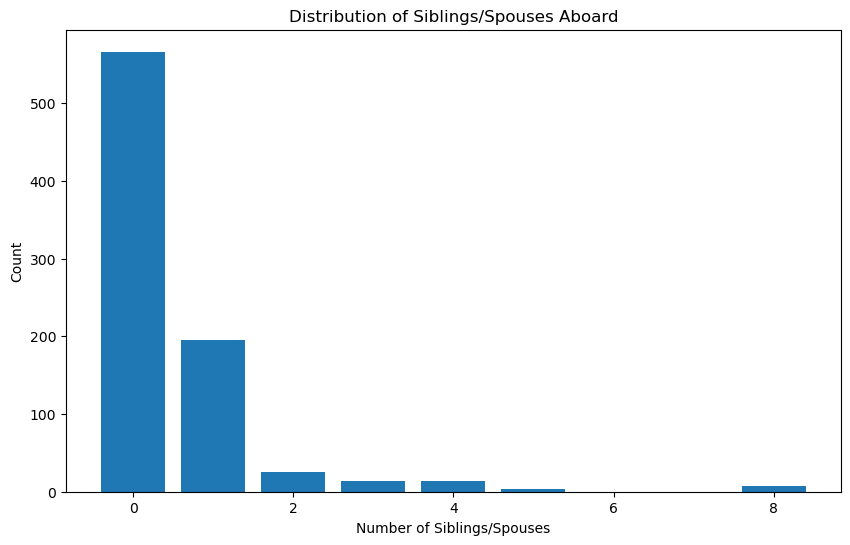

In [44]:
SibSp_counts = df['SibSp'].value_counts()
plt.figure(figsize=(10, 6))
plt.bar(SibSp_counts.index, SibSp_counts.values)
plt.xlabel('Number of Siblings/Spouses')
plt.ylabel('Count')
plt.title('Distribution of Siblings/Spouses Aboard')
plt.show()

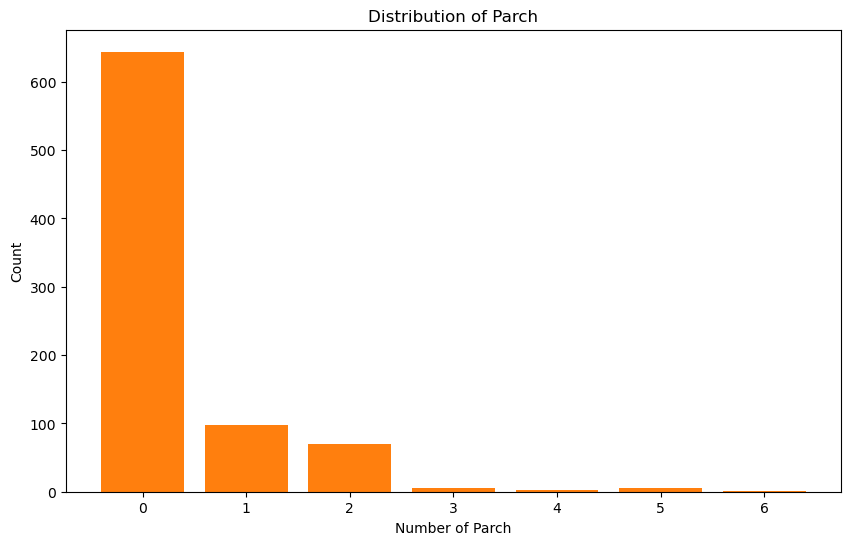

In [45]:
Parch_counts = df['Parch'].value_counts()
plt.figure(figsize=(10, 6))
plt.bar(Parch_counts.index, Parch_counts.values,color='#ff7f0e')
plt.xlabel('Number of Parch')
plt.ylabel('Count')
plt.title('Distribution of Parch')
plt.show()

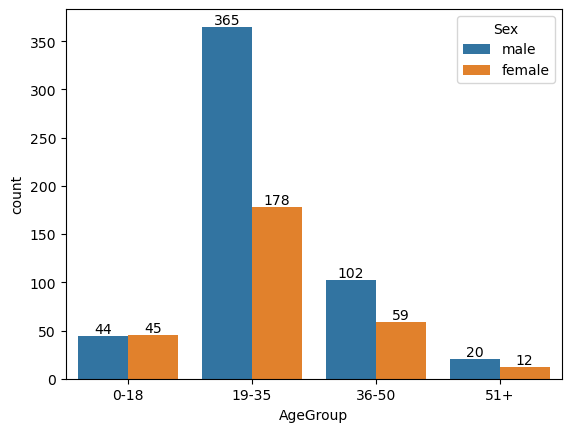

In [46]:
ax = sns.countplot(data = df, x = 'AgeGroup', hue = 'Sex')
for bars in ax.containers:
    ax.bar_label(bars)

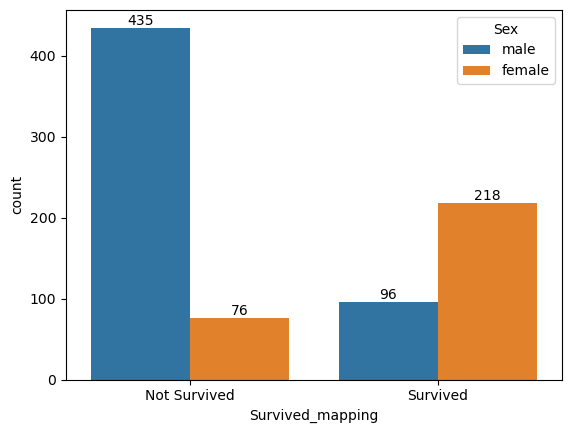

In [47]:
ax = sns.countplot(data = df, x = 'Survived_mapping', hue = 'Sex')
for bars in ax.containers:
    ax.bar_label(bars)

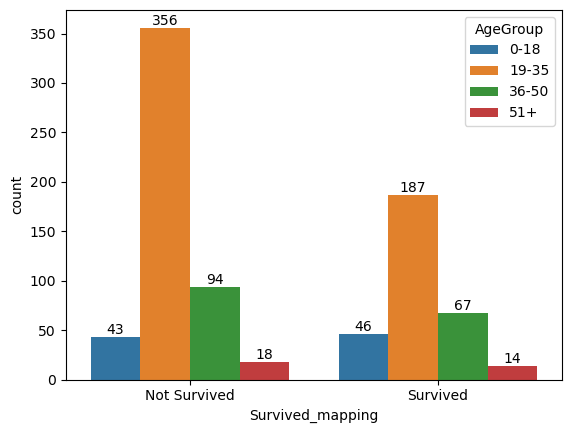

In [48]:
ax = sns.countplot(data = df, x = 'Survived_mapping', hue = 'AgeGroup')
for bars in ax.containers:
    ax.bar_label(bars)

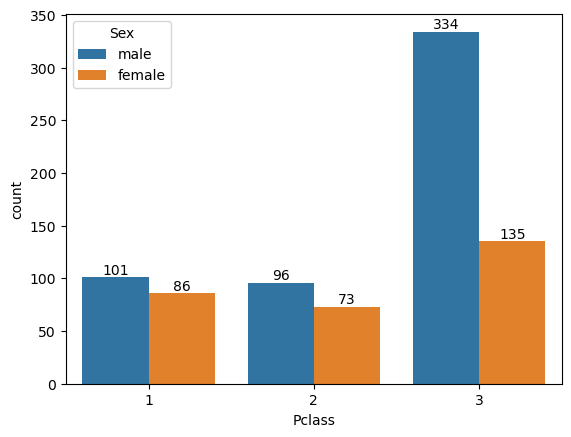

In [49]:
ax = sns.countplot(data = df, x = 'Pclass', hue = 'Sex')
for bars in ax.containers:
    ax.bar_label(bars)

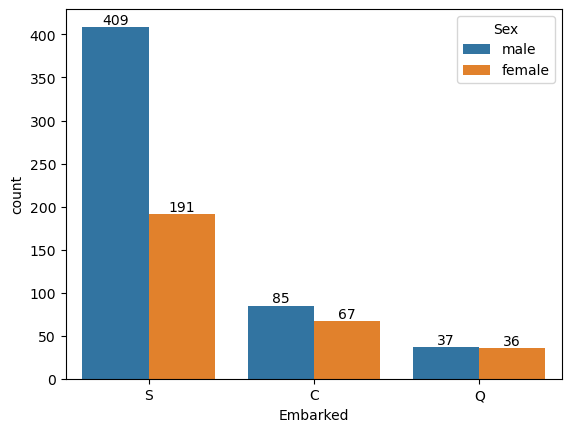

In [50]:
ax = sns.countplot(data = df, x = 'Embarked', hue = 'Sex')
for bars in ax.containers:
    ax.bar_label(bars)

In [51]:
df.dtypes

PassengerId            int64
Survived               int64
Pclass                 int64
Name                  object
Sex                   object
Age                    int32
SibSp                  int64
Parch                  int64
Ticket                object
Fare                 float64
Cabin                 object
Embarked              object
Survived_mapping      object
AgeGroup            category
dtype: object

In [52]:
label_encoder = LabelEncoder()


df['Sex_encoded'] = label_encoder.fit_transform(df['Sex'])
df['Embarked_encoded'] = label_encoder.fit_transform(df['Embarked'])
df['Ticket_encoded'] = label_encoder.fit_transform(df['Ticket'])
df['Cabin_encoded'] = label_encoder.fit_transform(df['Cabin'])
df['Name_encoded'] = label_encoder.fit_transform(df['Name'])

In [53]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived_mapping,AgeGroup,Sex_encoded,Embarked_encoded,Ticket_encoded,Cabin_encoded,Name_encoded
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,B96 B98,S,Not Survived,19-35,1,2,494,38,98
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,Survived,36-50,0,0,565,69,175
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,B96 B98,S,Survived,19-35,0,2,635,38,329
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,Survived,36-50,0,2,41,45,253
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,B96 B98,S,Not Survived,36-50,1,2,446,38,15


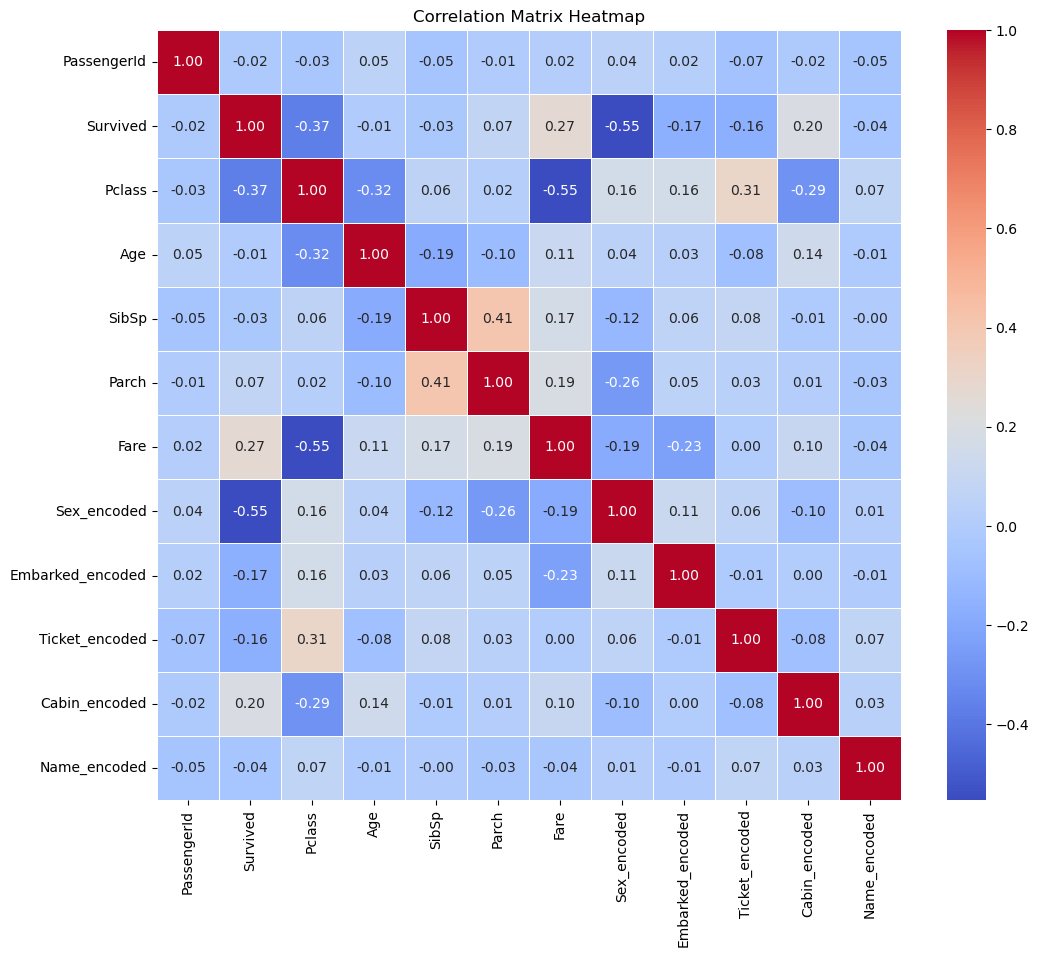

In [54]:
numeric_df_encoded = df.select_dtypes(include=['number'])

correlation_matrix_encoded = numeric_df_encoded.corr()


plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix_encoded, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [55]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Survived_mapping',
       'AgeGroup', 'Sex_encoded', 'Embarked_encoded', 'Ticket_encoded',
       'Cabin_encoded', 'Name_encoded'],
      dtype='object')

In [56]:
X = df[['Pclass', 'Age', 'Sex_encoded', 'Embarked_encoded']] 
y = df['Survived']  # Target


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

tree_model = DecisionTreeClassifier(random_state=42)


tree_model.fit(X_train, y_train)


y_pred_tree = tree_model.predict(X_test)


accuracy_tree = accuracy_score(y_test, y_pred_tree)
conf_matrix_tree = confusion_matrix(y_test, y_pred_tree)
classification_rep_tree = classification_report(y_test, y_pred_tree)

print("Decision Tree Model:")
print(f"Accuracy: {accuracy_tree:.2f}")
print("Confusion Matrix:\n", conf_matrix_tree)
print("Classification Report:\n", classification_rep_tree)

Decision Tree Model:
Accuracy: 0.76
Confusion Matrix:
 [[81 18]
 [21 45]]
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.82      0.81        99
           1       0.71      0.68      0.70        66

    accuracy                           0.76       165
   macro avg       0.75      0.75      0.75       165
weighted avg       0.76      0.76      0.76       165



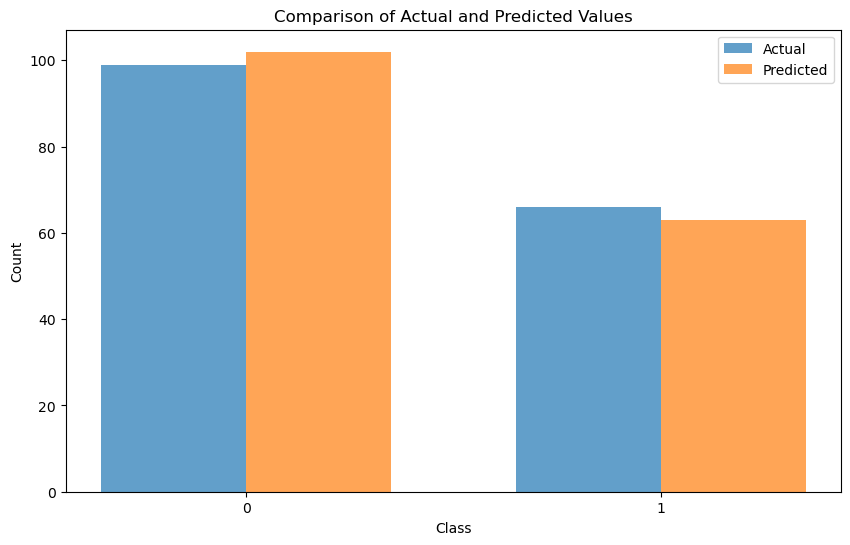

In [57]:

classes = np.unique(y_test)
fig, ax = plt.subplots(figsize=(10, 6))

width = 0.35
bar1 = ax.bar(classes - width/2, np.bincount(y_test), width, label='Actual', alpha=0.7)
bar2 = ax.bar(classes + width/2, np.bincount(y_pred_tree), width, label='Predicted', alpha=0.7)

ax.set_title('Comparison of Actual and Predicted Values')
ax.set_xlabel('Class')
ax.set_ylabel('Count')
ax.set_xticks(classes)
ax.legend()

plt.show()

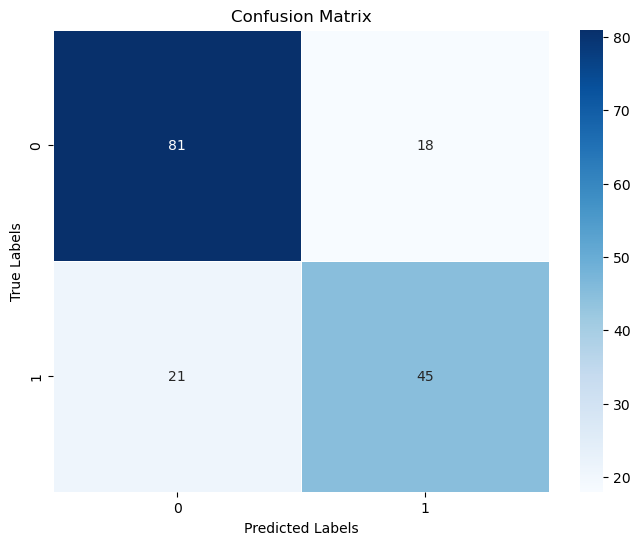

In [58]:
conf_matrix = confusion_matrix(y_test, y_pred_tree)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', linewidths=0.5)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()